In [1]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# 데이터셋 로드 (Iris 데이터셋 사용)
data = load_digits()
X = data.data  # 특성 데이터
y = data.target  # 목표 변수 (클래스 레이블)

# 데이터를 학습용 및 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 학습 (선형 커널 사용)
model = SVC(kernel='linear', random_state=42)  # 선형 커널 SVM 모델 생성
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산

# 결과 출력
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.96%


In [2]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# 데이터셋 로드 (손글씨 데이터셋 사용)
data = load_digits()
X = data.data  # 특성 데이터
y = data.target  # 목표 변수 (클래스 레이블)

# 데이터를 학습용 및 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 학습 (트리 개수: 100)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산

# 결과 출력
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.59%


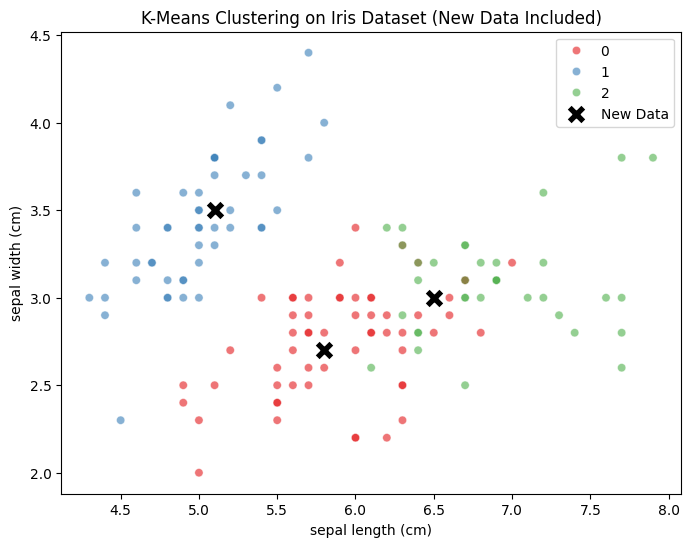

New Data Point 1: Cluster 1
New Data Point 2: Cluster 2
New Data Point 3: Cluster 0


In [3]:
# 필요한 라이브러리 임포트
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Iris 데이터셋 로드
data = load_iris()
X = data.data  # 특성 데이터

# K-평균 클러스터링 적용 (K=3, Iris 데이터셋에 3개의 종이 존재하므로) 
# (모르면 여러개로 나눠야 함 -> 여기서는 정답이 이미 3개로 나누는 데이터) 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)  # 클러스터 할당

# 데이터프레임 변환 (시각화를 위해)
df = pd.DataFrame(X, columns=data.feature_names)
df['Cluster'] = y_kmeans  # 클러스터 라벨 추가

# ------------- 새로운 데이터 예측 -------------
# 새로운 샘플 데이터 (예제)
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Setosa 범위
                     [6.5, 3.0, 5.2, 2.0],  # Virginica 범위
                     [5.8, 2.7, 4.1, 1.0]]) # Versicolor 범위

# 새로운 데이터의 클러스터 예측
new_clusters = kmeans.predict(new_data)

# 새로운 데이터 추가 (시각화를 위해 첫 번째, 두 번째 특성만 사용)
new_df = pd.DataFrame(new_data, columns=data.feature_names)
new_df['Cluster'] = new_clusters

# ------------- 클러스터링 결과 시각화 -------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['Cluster'], palette='Set1', alpha=0.6)
sns.scatterplot(x=new_df['sepal length (cm)'], y=new_df['sepal width (cm)'], color='black', marker='X', s=200, label="New Data")

plt.title("K-Means Clustering on Iris Dataset (New Data Included)")
plt.legend()
plt.show()

# 새로운 데이터의 예측된 클러스터 출력
for i, cluster in enumerate(new_clusters):
    print(f"New Data Point {i+1}: Cluster {cluster}")

In [4]:
# 필요한 라이브러리 임포트
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 릿지 회귀 적용 (L2 정규화)
ridge = Ridge(alpha=1.0)  # L2 패널티 적용
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)  # 평균 제곱 오차(MSE)
ridge_r2 = r2_score(y_test, y_ridge_pred)  # 결정 계수(R²)

# 라쏘 회귀 적용 (L1 정규화)
lasso = Lasso(alpha=0.1)  # L1 패널티 적용
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)  # 평균 제곱 오차(MSE)
lasso_r2 = r2_score(y_test, y_lasso_pred)  # 결정 계수(R²)

# 결과 출력
print(f"Ridge Regression - MSE: {ridge_mse:.4f}, R² Score: {ridge_r2:.4f}")
print(f"Lasso Regression - MSE: {lasso_mse:.4f}, R² Score: {lasso_r2:.4f}")


Ridge Regression - MSE: 3.3379, R² Score: 0.5824
Lasso Regression - MSE: 3.3742, R² Score: 0.5778


In [5]:
# 필요한 라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# 데이터셋 로드 (손글씨 데이터셋 사용)
data = load_digits()
X = data.data  # 특성 데이터
y = data.target  # 목표 변수 (클래스 레이블)

# 데이터를 학습용 및 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 일반 로지스틱 회귀 (정규화 미적용)
logistic_clf = LogisticRegression(solver='liblinear', random_state=42)
logistic_clf.fit(X_train, y_train)

# 예측 수행
y_pred = logistic_clf.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print(f"Logistic Regression (No Regularization) - Accuracy: {accuracy * 100:.2f}%")


Logistic Regression (No Regularization) - Accuracy: 95.37%


In [6]:
# 필요한 라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# 데이터셋 로드 (손글씨 데이터셋 사용)
data = load_digits()
X = data.data  # 특성 데이터
y = data.target  # 목표 변수 (클래스 레이블)

# 데이터를 학습용 및 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화 (로지스틱 회귀는 스케일링된 데이터에서 더 안정적으로 동작)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso (L1 정규화) 적용한 로지스틱 회귀
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso_clf.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_clf.predict(X_test_scaled)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)

# Ridge (L2 정규화) 적용한 로지스틱 회귀
ridge_clf = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
ridge_clf.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_clf.predict(X_test_scaled)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

# 결과 출력
print(f"Lasso (L1) Logistic Regression - Accuracy: {accuracy_lasso * 100:.2f}%")
print(f"Ridge (L2) Logistic Regression - Accuracy: {accuracy_ridge * 100:.2f}%")

Lasso (L1) Logistic Regression - Accuracy: 97.04%
Ridge (L2) Logistic Regression - Accuracy: 96.48%


In [7]:
# 필요한 라이브러리 임포트
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# 데이터셋 로드 (손글씨 데이터셋 사용)
data = load_digits()
X = data.data  # 특성 데이터
y = data.target  # 목표 변수 (클래스 레이블)

# 데이터를 학습용 및 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Min-Max 정규화 적용 (0에서 1 범위로 스케일링)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# 표준화 적용 (Z-점수 정규화)
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# 랜덤 포레스트 분류 모델 학습 (Min-Max 정규화 데이터 사용)
model_minmax = RandomForestClassifier(n_estimators=100, random_state=42)
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

# 랜덤 포레스트 분류 모델 학습 (표준화 데이터 사용)
model_standard = RandomForestClassifier(n_estimators=100, random_state=42)
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

# 결과 출력
print(f"Random Forest with Min-Max Scaling - Accuracy: {accuracy_minmax * 100:.2f}%")
print(f"Random Forest with Standard Scaling - Accuracy: {accuracy_standard * 100:.2f}%")


Random Forest with Min-Max Scaling - Accuracy: 97.59%
Random Forest with Standard Scaling - Accuracy: 97.41%
